In [124]:
!pip install scikit-learn

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [72]:
# Chargement des données
df = pd.read_csv("bad_words.csv")

# Business Understanding

In [73]:
df.head(8)

,text,canonical_form_1,canonical_form_2,category_1,category_2,severity_rating,severity_description
0,69,69,NaN,sexual anatomy / sexual acts,NaN,1.0,Mild
1,@55,ass,NaN,sexual anatomy / sexual acts,NaN,1.0,Mild
2,@ssfcker,fuck,ass,sexual anatomy / sexual acts,sexual orientation / gender,2.8,Severe
3,@ssfucker,fuck,ass,sexual anatomy / sexual acts,sexual orientation / gender,2.8,Severe
4,@ssfvcker,fuck,ass,sexual anatomy / sexual acts,sexual orientation / gender,2.4,Strong
5,@sshole,ass,NaN,sexual anatomy / sexual acts,NaN,1.6,Strong
6,0ral seks,sex,NaN,sexual anatomy / sexual acts,NaN,1.0,Mild
7,0ral sex,sex,NaN,sexual anatomy / sexual acts,NaN,1.8,Strong


In [39]:
df = df.drop(columns=["severity_rating"])

In [75]:
df.head(5)

,text,canonical_form_1,canonical_form_2,category_1,category_2,severity_rating,severity_description
0,69,69,NaN,sexual anatomy / sexual acts,NaN,1.0,Mild
1,@55,ass,NaN,sexual anatomy / sexual acts,NaN,1.0,Mild
2,@ssfcker,fuck,ass,sexual anatomy / sexual acts,sexual orientation / gender,2.8,Severe
3,@ssfucker,fuck,ass,sexual anatomy / sexual acts,sexual orientation / gender,2.8,Severe
4,@ssfvcker,fuck,ass,sexual anatomy / sexual acts,sexual orientation / gender,2.4,Strong


In [29]:
df.to_csv("bad_words_1.csv", index=False)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  1598 non-null   object 
 1   canonical_form_1      1598 non-null   object 
 2   canonical_form_2      210 non-null    object 
 3   category_1            1598 non-null   object 
 4   category_2            486 non-null    object 
 5   severity_rating       1598 non-null   float64
 6   severity_description  1598 non-null   object 
dtypes: float64(1), object(6)
memory usage: 87.5+ KB


In [41]:
df.columns

Index(['text', 'canonical_form_1', 'canonical_form_2', 'category_1',
       'category_2', 'severity_description'],
      dtype='object')

In [77]:
df.tail(6)

,text,canonical_form_1,canonical_form_2,category_1,category_2,severity_rating,severity_description
1592,wise ass,ass,NaN,sexual anatomy / sexual acts,other / general insult,1.0,Mild
1593,wnker,wank,NaN,sexual anatomy / sexual acts,other / general insult,1.0,Mild
1594,wop,wop,NaN,racial / ethnic slurs,NaN,2.4,Strong
1595,wophead,wop,NaN,racial / ethnic slurs,NaN,2.2,Strong
1596,zip in the wire,zipperhead,NaN,racial / ethnic slurs,NaN,1.4,Mild
1597,zipperhead,zipperhead,NaN,racial / ethnic slurs,NaN,2.4,Strong


In [78]:
#data shape
print(df.shape)

(1598, 7)


In [79]:
df.describe()

,severity_rating
count,1598.000000
mean,2.028160
std,0.645068
min,1.000000
25%,1.400000
50%,2.000000
75%,2.600000
max,3.000000


#Bivariate Analysis

Instaling sweetviz
* Sweetviz est une bibliothèque Python open-source qui génère de belles visualisations haute densité pour démarrer l'EDA (Exploratory Data Analysis) avec seulement deux lignes de code. La sortie est une application HTML entièrement autonome
* Le système est construit autour de la visualisation rapide des valeurs cibles et de la comparaison des ensembles de données .
* Son objectif est d'aider à une analyse rapide des caractéristiques cibles, des données de formation par rapport aux tests et d'autres tâches de caractérisation des données

In [154]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.8 MB/s eta 0:00:00


In [155]:
import sweetviz as sv
report=sv.analyze(df) #générer le rapport
report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data visualization

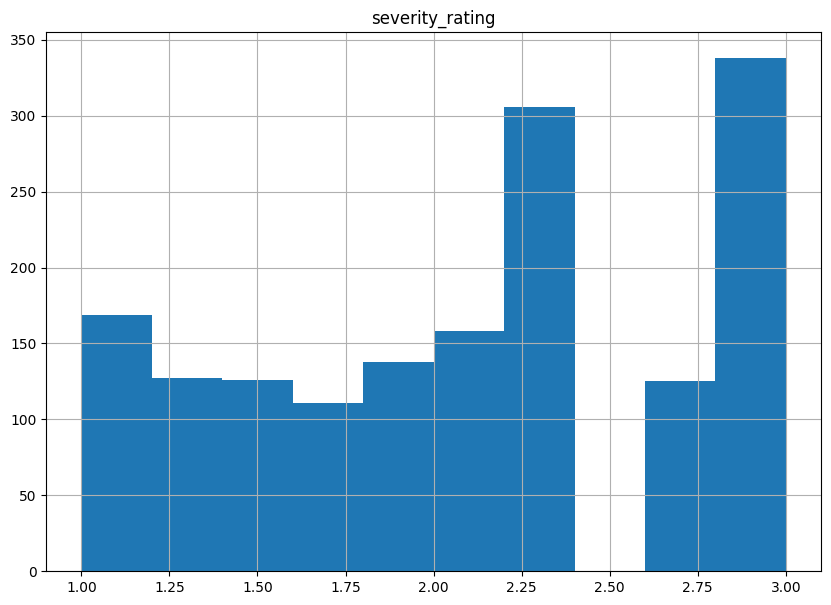

In [82]:
# Displying Histograms
numerical_columns = df.select_dtypes(include=['number', 'datetime']).columns


if len(numerical_columns) > 0:
    df[numerical_columns].hist(figsize=(10, 7))  # Plot histograms for numerical columns
    plt.show()
else:
    print("No numerical or datetime columns found in the DataFrame to plot histograms.")

<ipython-input-112-49ad0e4b02a1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='severity_description', data=df, palette='coolwarm')


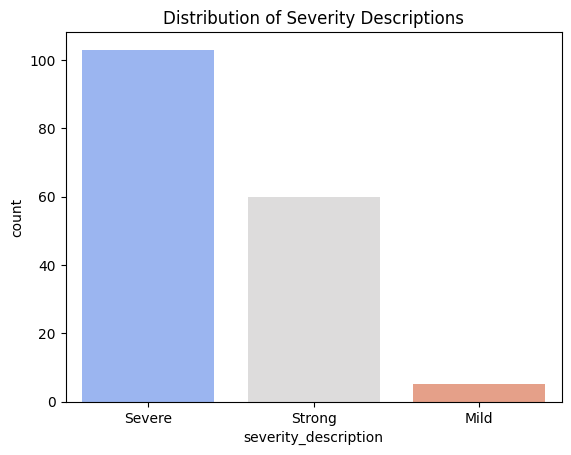

In [112]:
sns.countplot(x='severity_description', data=df, palette='coolwarm')
plt.title("Distribution of Severity Descriptions")
plt.show()

# Data Preperation

In [83]:
# Check for duplicate rows in the DataFrame and count them
df.duplicated().sum()

0

In [84]:
# Check for missing (null/NaN) values in the DataFrame and count them per column
df.isnull().sum()

,0
text,0
canonical_form_1,0
canonical_form_2,1388
category_1,0
category_2,1112
severity_rating,0
severity_description,0


In [85]:
#Drop Rows with Missing Values
df = df.dropna()

In [86]:
#Count Remaining Missing Values
df.isna().sum()

,0
text,0
canonical_form_1,0
canonical_form_2,0
category_1,0
category_2,0
severity_rating,0
severity_description,0


In [87]:
# Describe the target
print(df['severity_description'].describe())

count        168
unique         3
top       Severe
freq         103
Name: severity_description, dtype: object


<Axes: >

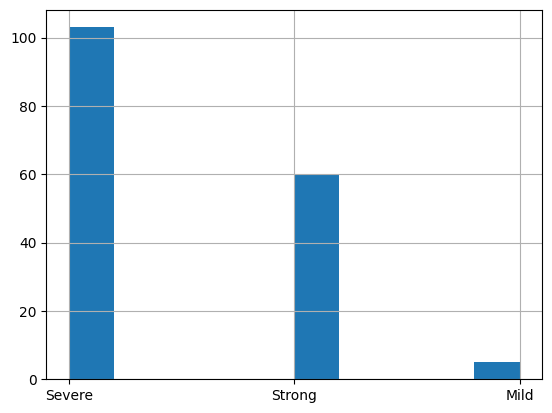

In [88]:
df['severity_description'].hist()

In [89]:
#calculate the relative frequencies of unique values in the "label" column
df["severity_description"].value_counts() / len(df)

,count
severity_description,
Severe,0.613095
Strong,0.357143
Mild,0.029762


**Discovering the given dataset deeply**

In [90]:
df_1 = df.copy()

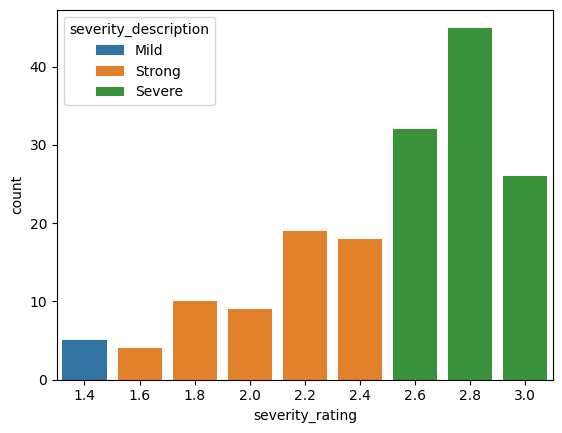

In [91]:
sns.countplot(x = 'severity_rating',hue = "severity_description",data = df_1)
plt.show()

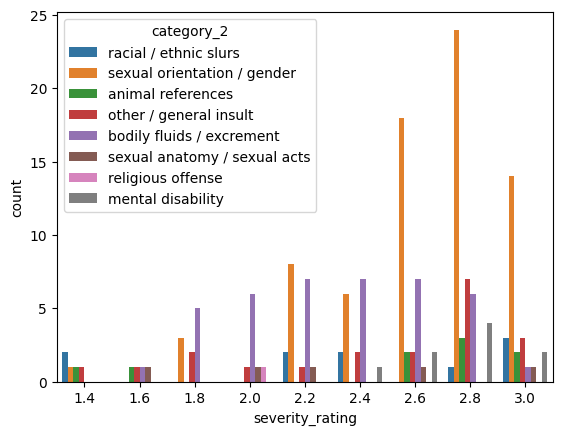

In [93]:
sns.countplot(x = 'severity_rating',hue = "category_2",data = df_1)
plt.show()

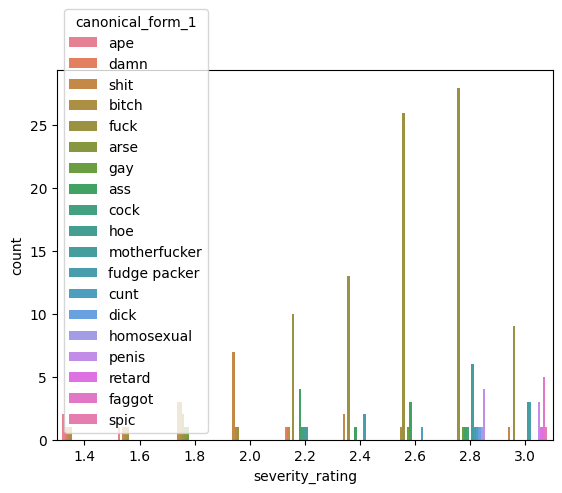

In [94]:
sns.countplot(x = 'severity_rating',hue = "canonical_form_1",data = df_1)
plt.show()

In [100]:
# Display correlation matrix for numerical columns
corr = df_1.corr(numeric_only=True)
corr

,severity_rating
severity_rating,1.0


In [101]:
df_1.describe()

,severity_rating
count,168.000000
mean,2.509524
std,0.418042
min,1.400000
25%,2.200000
50%,2.600000
75%,2.800000
max,3.000000


**Dealing with categorical values**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 2 to 1535
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  168 non-null    object 
 1   canonical_form_1      168 non-null    object 
 2   canonical_form_2      168 non-null    object 
 3   category_1            168 non-null    object 
 4   category_2            168 non-null    object 
 5   severity_rating       168 non-null    float64
 6   severity_description  168 non-null    object 
dtypes: float64(1), object(6)
memory usage: 10.5+ KB


In [102]:
df['severity_description'].value_counts()

,count
severity_description,
Severe,103
Strong,60
Mild,5


In [106]:
df['severity_rating'].value_counts()

,count
severity_rating,
2.8,45
2.6,32
3.0,26
2.2,19
2.4,18
1.8,10
2.0,9
1.4,5
1.6,4


In [107]:
df['category_1'].value_counts()

,count
category_1,
sexual anatomy / sexual acts,140
bodily fluids / excrement,12
sexual orientation / gender,8
other / general insult,4
racial / ethnic slurs,2
religious offense,2


In [108]:
df['category_2'].value_counts()

,count
category_2,
sexual orientation / gender,74
bodily fluids / excrement,40
other / general insult,20
racial / ethnic slurs,10
animal references,9
mental disability,9
sexual anatomy / sexual acts,5
religious offense,1


In [109]:
df['canonical_form_1'].value_counts()

,count
canonical_form_1,
fuck,90
shit,16
motherfucker,10
ass,9
bitch,7
penis,7
fudge packer,6
faggot,5
ape,3


In [110]:
df['canonical_form_2'].value_counts()

,count
canonical_form_2,
shit,40
ass,38
fuck,25
dick,8
butt,8
pig,7
retard,5
arse,5
motherfucker,4


# Feature scaling & Transformation

In [119]:
# Encode categorical target variable
label_encoder = LabelEncoder()
df['severity_description_encoded'] = label_encoder.fit_transform(df['severity_description'])

In [120]:
# Using severity_rating as a numerical feature
features = ['severity_rating']
X = df[features]
y = df['severity_description_encoded']

In [ ]:
# Model Training & Evaluation
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


# Modeling

In [121]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
#shape of our data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (134, 1) (134,)
Test set: (34, 1) (34,)


In [122]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model

In [126]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train_scaled, y_train)
    yhat = neigh.predict(X_test_scaled)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

best_k = mean_acc.argmax() + 1
print("The best accuracy was with", mean_acc.max(), "with k=", best_k)

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

The best accuracy was with 1.0 with k= 1



KNN Model Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



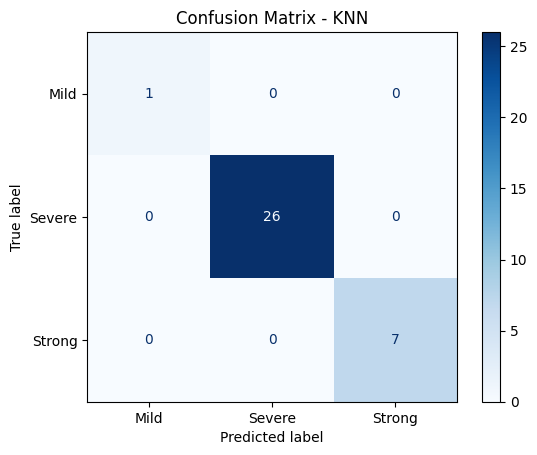

In [129]:
print("\nKNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

# SVM Model

In [132]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


SVM Model Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



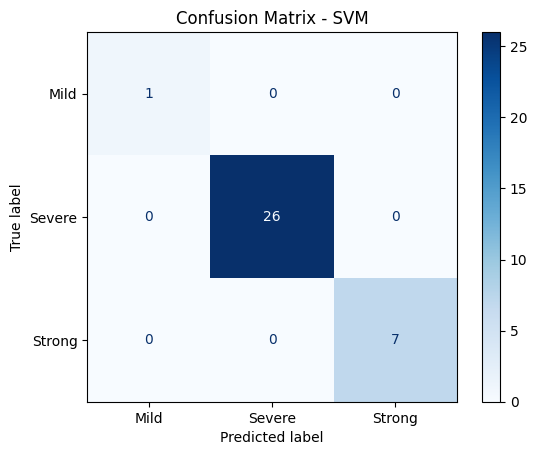

In [133]:
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

# Random Forest Model

In [136]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


Random Forest Model Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



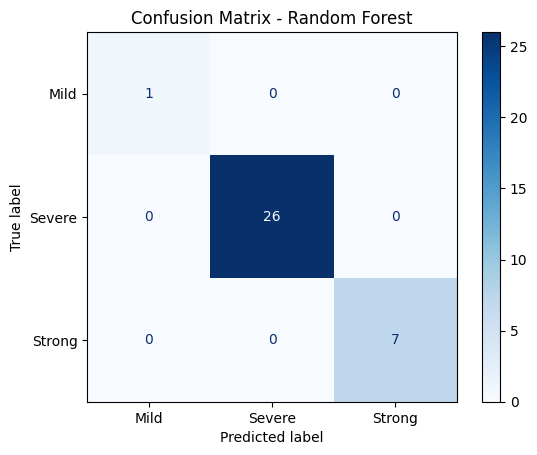

In [137]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Decision Tree Model

In [140]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)


Decision Tree Model Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



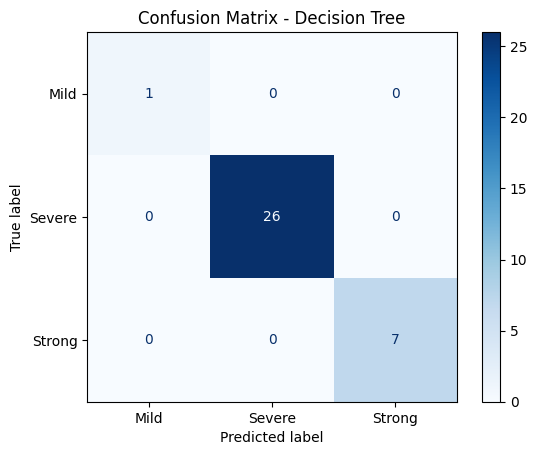

In [141]:
print("\nDecision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


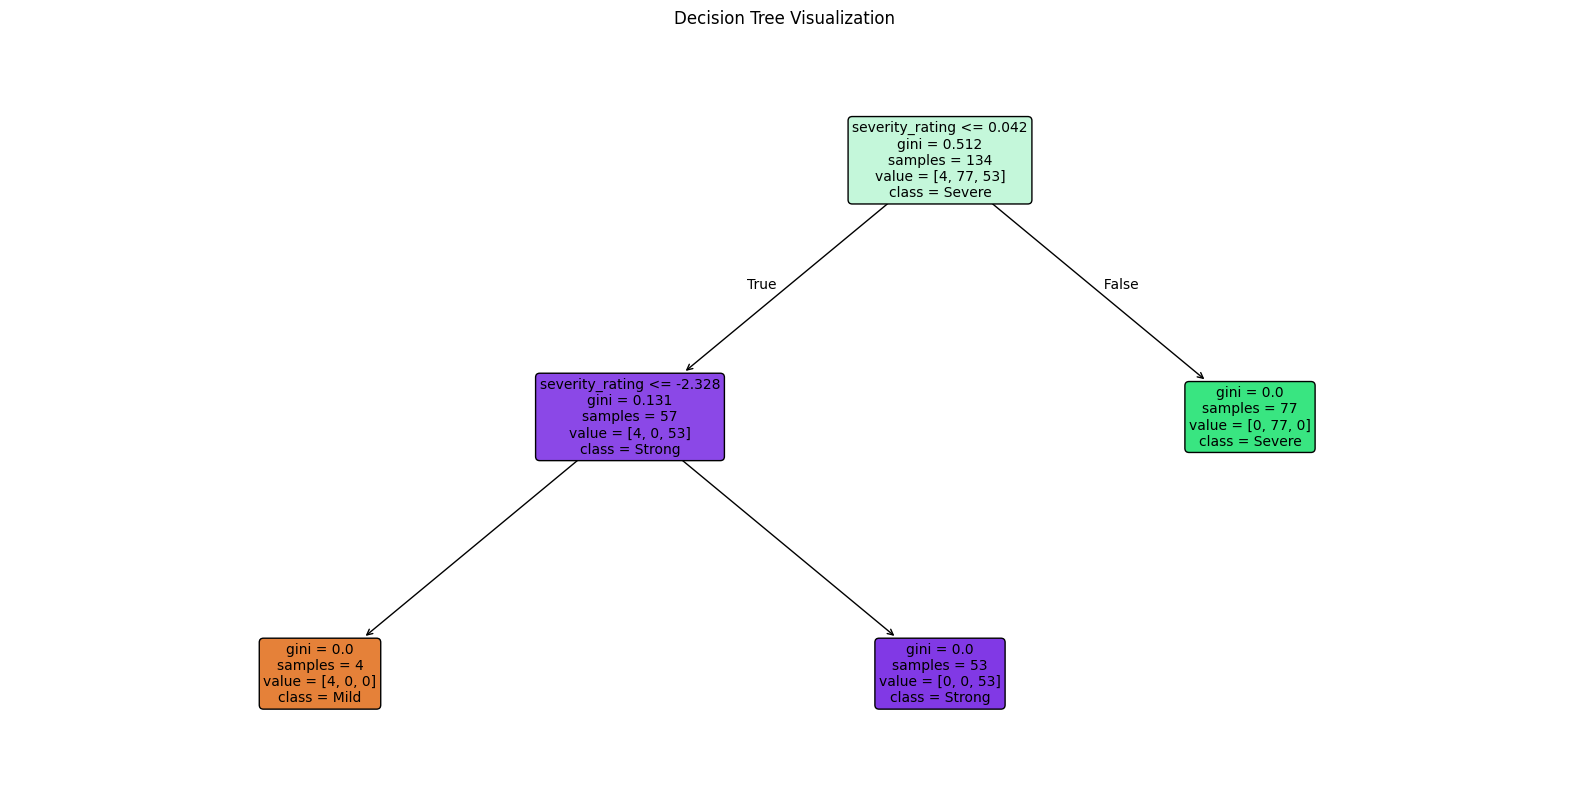

In [143]:
# Visualize Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, max_depth=3, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [145]:
# Display Decision Tree Rules
from sklearn.tree import export_text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)

|--- severity_rating <= 0.04
|   |--- severity_rating <= -2.33
|   |   |--- class: 0
|   |--- severity_rating >  -2.33
|   |   |--- class: 2
|--- severity_rating >  0.04
|   |--- class: 1



# Results Comparison

<ipython-input-148-e60ac926ade5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


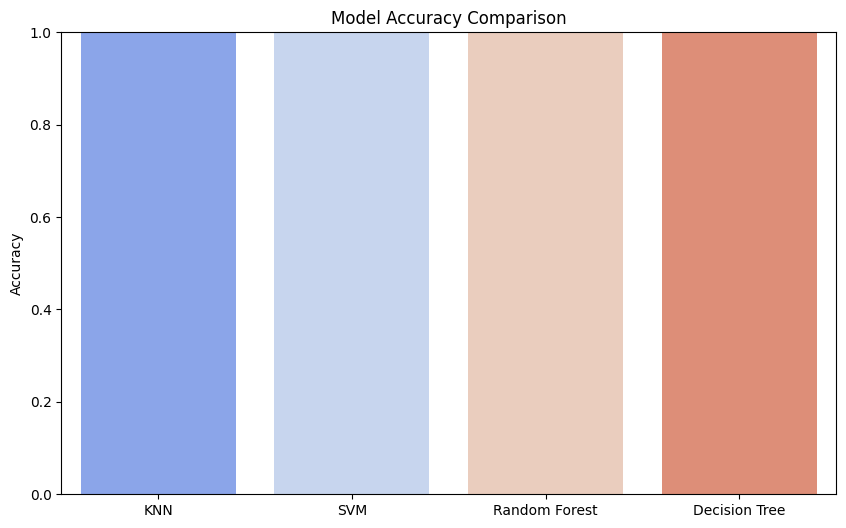

In [148]:
# Model Comparison
models = ['KNN', 'SVM', 'Random Forest', 'Decision Tree']

# Calculate and store accuracies
knn_acc = accuracy_score(y_test, y_pred_knn)
svm_acc = accuracy_score(y_test, y_pred_svm)
rf_acc = accuracy_score(y_test, y_pred_rf)
dt_acc = accuracy_score(y_test, y_pred_dt)

accuracies = [knn_acc, svm_acc, rf_acc, dt_acc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [152]:
# Conclusion
best_model_idx = np.argmax(accuracies)
print(f"All of the models seems to have great accuracy but when coming down to one model to choose  is {models[best_model_idx]} with an accuracy of {accuracies[best_model_idx]:.2f}.")

All of the models seems to have great accuracy but when coming down to one model to choose  is KNN with an accuracy of 1.00.
